## 常用的推荐系统算法

- 协同过滤推荐 Collaborative Filtering Recommendation
    该算法的核心是分析用户的兴趣和行为，利用共同行为习惯的群体有相似喜好的原则，推荐用户感兴趣的信息。
    - 基于用户的协同过滤
    - 基于物品的协同过滤
- 基于内容过滤推荐 Content-based Filtering Recommendation
    该算法的核心是衡量出两个物品的相似度，然后基于用户以往的喜好记录，推荐给用户相似的物品。
- 组合推荐 Hybrid Recommendation
    实际应用中往往不只采用某一种推荐方法，而是通过一定的组合方法将多个算法混合在一起，以实现更好的推荐效果，比如加权混合、分层混合等，具体方式和应用场景有很大的关系。
    
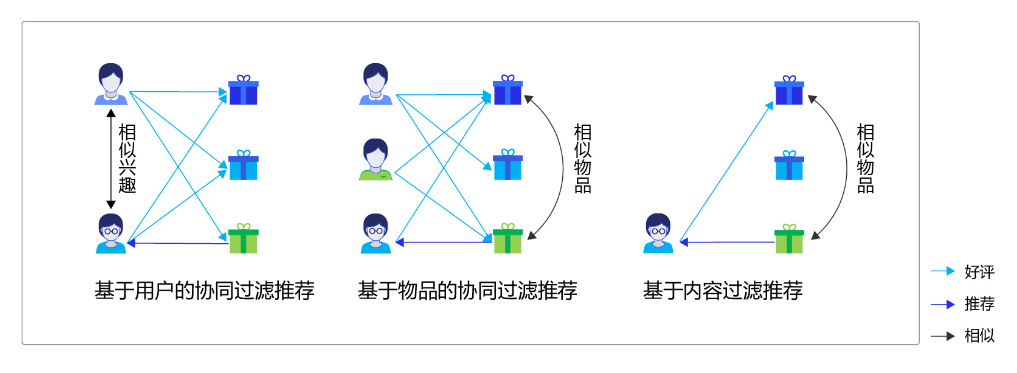

## 电影推荐算法设计

### 数据集介绍

ml-1m电影推荐数据集

- 包含6000多位用户对3900部电影的共100万条评分数据，评分均为1～5的整数，其中每部电影的评分数据至少有20条。
- 该数据集包含3个数据文件
    - users.dat 用户属性信息
    - movies.dat 电影属性信息
    - ratings.dat 电影评分信息
- 扩充的两份数据
    - posters 电影海报
    - new_rating.txt 包含海报图像的新评分数据文件
- 分析出样本数据一共有4类特征（构建模型网络的输入层预计也会有四种结构）
    - ID类特征
    - 列表类特征
    - 图像类特征
    - 文本类特征

### 如何实现推荐

- 将用户的原始特征转变为一种代表用户喜好的特征向量，将电影的原始特征转变为代表电影特性的特征向量，那么计算两个向量的相似度，就可以代表用户对电影的喜欢程度。
- 假如给用户A推荐，计算电影库中“每一个电影的特征向量”与“用户A的特征向量”的余弦相似度，然后根据相似度排序，取Top k的电影推荐给A。
- 实现推荐的基础是以上两个特征向量的有效性，它们决定了推荐的效果。

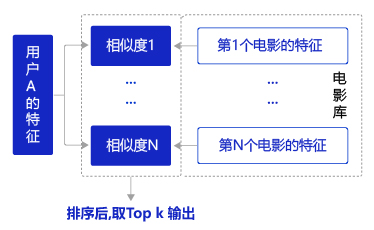

### 如何获得有效特征

- 对于用户评分较高的电影，电影的特征向量和用户的特征向量应该高度相似，反之则相异。
- 根据数据集中大量的电影评分样本，构建如下图所示的训练模型，学习出用户特征向量和电影特征向量的计算方案。

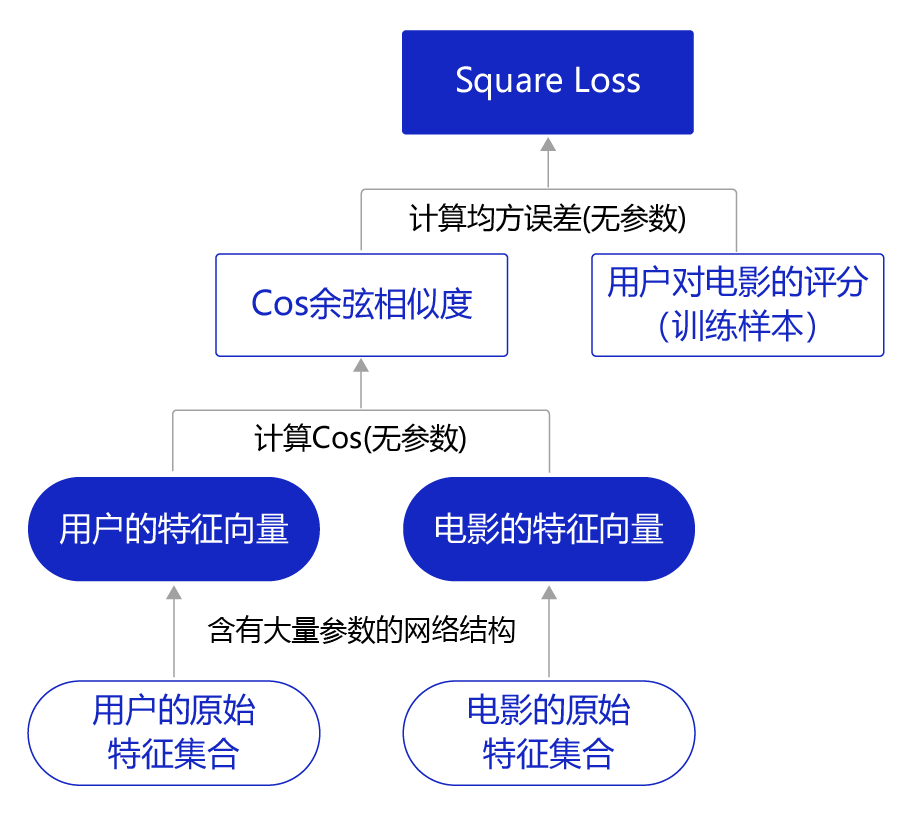

- 第一层：特征变换，原始特征集合变换为特征向量。
- 第二层：计算向量相似度，为确保结果与电影评分可比较，两个特征向量的相似度从[0-1]缩放5倍到[0-5]（电影评分为1～5分）。
- 第三层：计算Loss，计算缩放后到相似度与用户对电影真实评分的“均方误差”。

以在训练样本上的Loss最小化为目标，即可学习出模型的网络参数，这些参数本质上就是从原始特征集合到特征向量的计算方法。

### 从原始特征到特征向量之间的网络设计构想

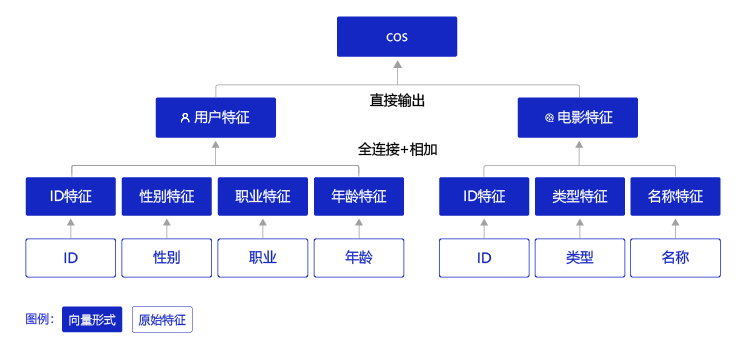